# 사이킷런으로 무엇을 할 수 있을까?
<지도학습>
- regression
- classification

<비지도학습>
- clustering
- dimensionality

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 회귀분석

In [19]:
# 인슐린이 0인 데이터의 수치를 회귀분석 해봅시다.
train = df[df["Insulin"] > 0]
test =  df[df["Insulin"] == 0]

feature_names = df.columns.tolist()
feature_names.remove("Insulin")

label_name = "Insulin"

In [20]:
X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]

In [21]:
# 학습하기
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
#model.fit(X_train, y_train)
#pred = model.predict(X_test)

# cross validation으로 학습세트의 오차 측정하기

In [26]:
from sklearn.model_selection import cross_validate
#이렇게 해서 모의고사를 다섯set로 나눠서 평균이 되는 값으로 fitting이 이뤄지는구나!
cross_validate?
y_predict = cross_val_predict(model, X_train, y_train, cv = 5, n_jobs = -1, verbose= 2)


In [23]:
#학습
model.predict(X_test)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

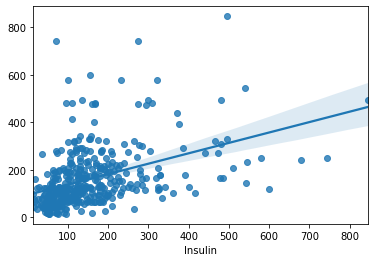

In [24]:
sns.regplot(y_train, y_predict)


In [25]:
# r2_score
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.21750435882914276

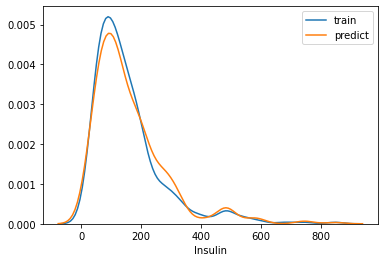

In [29]:
sns.distplot(y_train, hist = False, label = "train")
sns.distplot(y_predict, hist = False, label = "predict")

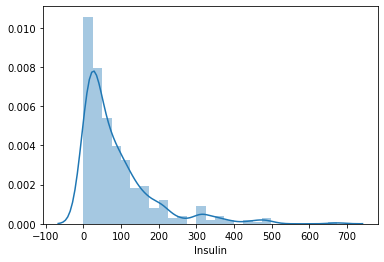

In [31]:
# 오차
# MAE구하는 법
error = abs(y_train - y_predict)
error.mean()
sns.distplot(error)

In [36]:
# RMSE 구하는법
np.sqrt(((y_train - y_predict)**2).mean())


130.89154459590011

# 회귀로 학습한 결과를 시각화하기

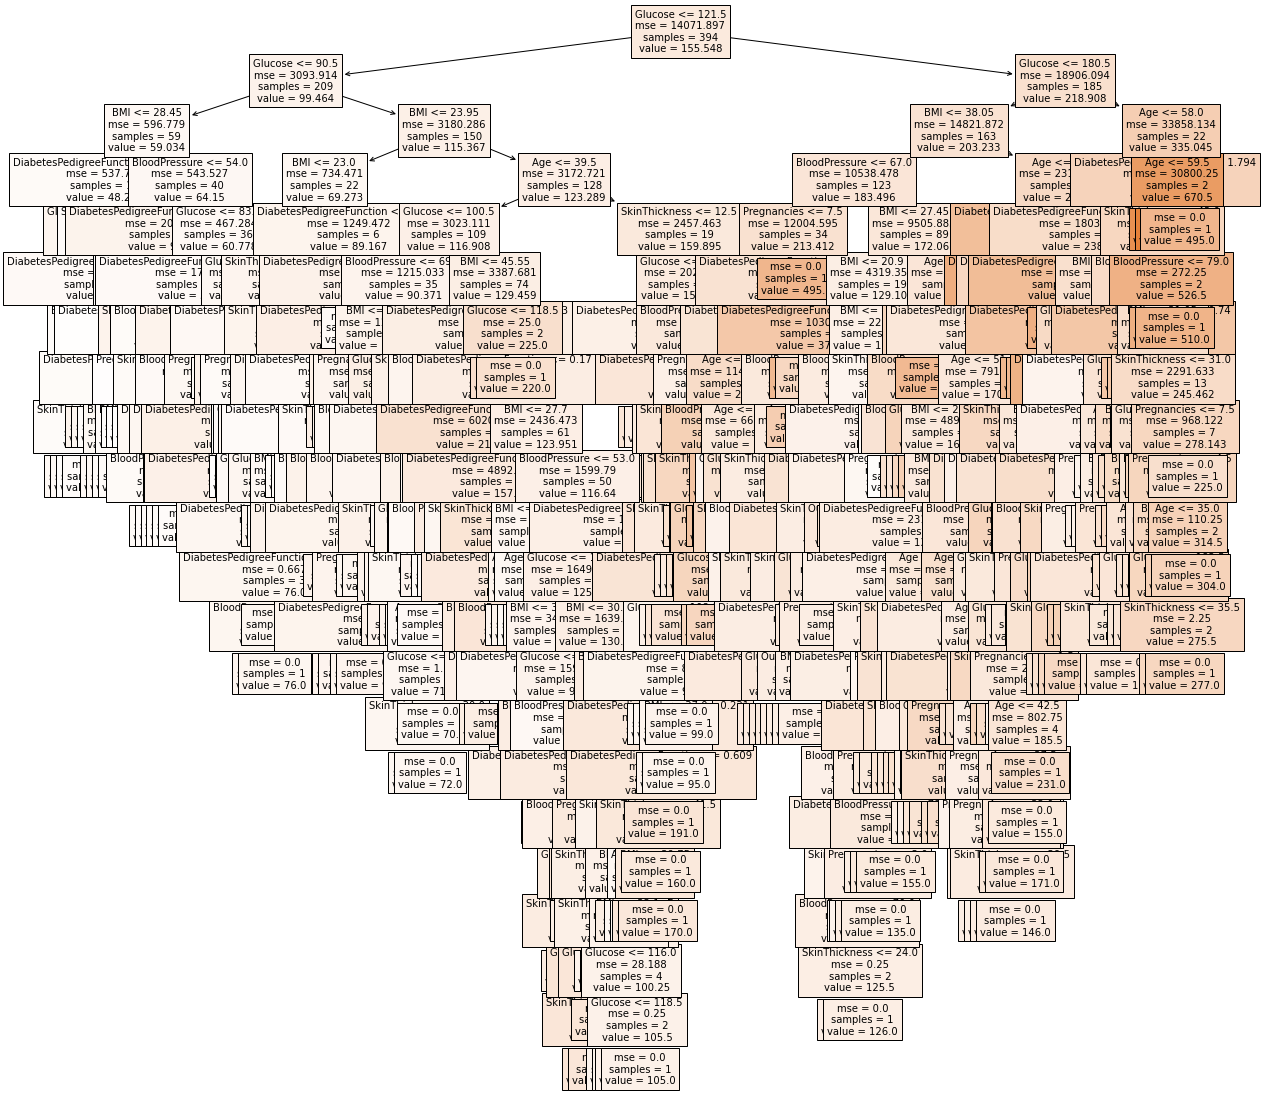

In [37]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize = 10)


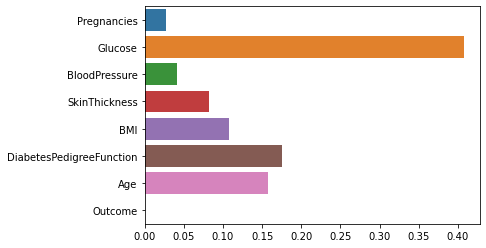

In [38]:
# 피쳐의 중요도
sns.barplot(model.feature_importances_, feature_names)

In [52]:
y_test = model.predict(X_test)
test["Insulin"] = y_test

<ipython-input-52-3db62c2e18a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Insulin"] = y_test


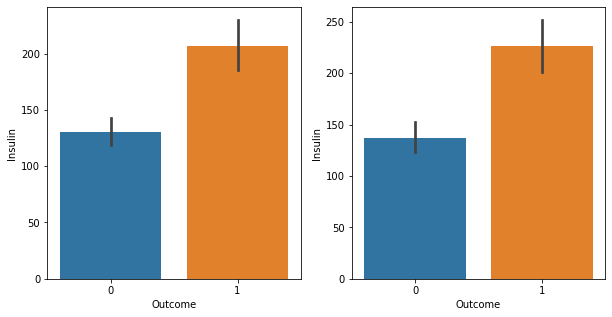

In [53]:
# 시각화
fig = plt.figure(figsize= (10,5))
# train 시각화
sns.barplot(data =train, x = "Outcome", y = "Insulin", ax= fig.add_subplot(1,2,1))
# test 시각화
sns.barplot(data =test, x = "Outcome", y = "Insulin", ax = fig.add_subplot(1,2,2))


# 이상치 제거하기

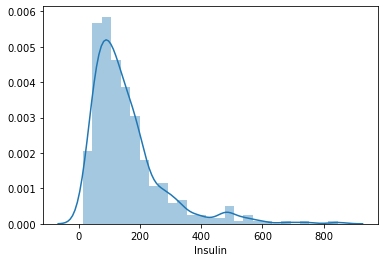

In [54]:
sns.distplot(train["Insulin"])

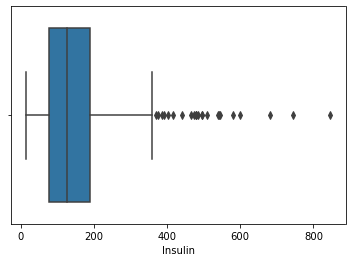

In [57]:
# boxplot을 통해서 우리는 이상치의 유무를 쉽게 파악가능하다.
sns.boxplot(train["Insulin"])


In [59]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [67]:
# IQR을 이용해서 이상치를 제거해줍시다.
IQR = desc["75%"] - desc["25%"]
OUT = desc["75%"] + IQR*1.5
print("IQR = {}, OUT = {}".format(IQR, OUT))

IQR = 113.75, OUT = 360.625


In [69]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [89]:
# 이상치로 판별된 24개를 모두 제거하는 것은 sample 수를 너무 없애므로,
# 대충 600을 기준으로 이상치를 제거합니다.

train = train[train["Insulin"] < 600]
test =  df[df["Insulin"] == 0]

feature_names = df.columns.tolist()
feature_names.remove("Insulin")
label_name = "Insulin"

X_train = train[feature_names]
y_train = train[label_name]
X_test = test[feature_names]
y_test = test[label_name]

# 학습하기
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 5, verbose =2, n_jobs = -1)
model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [78]:
#애초에 회귀에서 이런걸 하는게 말이 안됌.
(y_predict == y_train).sum()

5

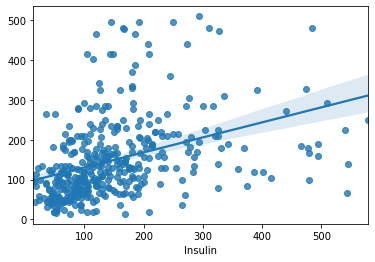

In [79]:
# 기울기가 1인 직선이 나오면 좋은 거임
sns.regplot(y_train, y_predict)

MAE=  78.01538461538462


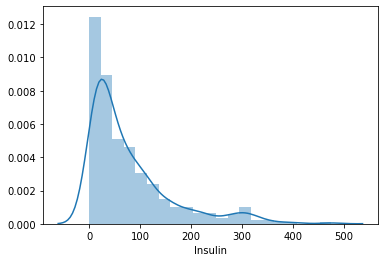

In [84]:
#오차 확인하기.
error = abs(y_train - y_predict)
MAE = error.mean()
sns.distplot(error)
print("MAE= ",MAE)

In [85]:
# RMSE

rmse = np.sqrt(((y_train - y_predict)**2).mean())
print("rmse = ", rmse)

# 기준을 600으로 잡았는데, 아까 구한 OUT으로 인슐린의 이상치를 잡아서 할 수 도 있따.

rmse =  113.85762589461882


In [108]:
# 결측치를 회귀분석으로 구해진 값으로 채워지면 더 좋은 성능을 가질 수 있다. 
#df.loc[df["Insulin"] == 0, "Insulin"] = pred
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#데이터 setting
X, y = df.drop("Outcome", axis = 1), df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size = 0.8, shuffle = True, random_state = 42)


pred

In [110]:
print("X_train = {}, X_test = {}, y_train = {}, y_test = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train = (614, 8), X_test = (154, 8), y_train = (614,), y_test = (154,)


In [111]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8051948051948052

# 정리
1) 결측치를 회귀분석으로 예측한 다음에 --> Outcome을 찾아주는 방식으로 한다면, 훨씬 좋은 결과를 얻을 수 있다.


# 질문 --> 이거 사용방법이 좀

# 나머지 공부
1) y_predict = cross_val_predict(model, X_train, y_train, cv = 5, n_jobs = -1, verbose= 2)
<br>
2) randomized search cv
